## Загрузка и чтение данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


Монтирование Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Чтение данных

In [ ]:
prices_data = pd.read_csv("/content/drive/MyDrive/stock prices.csv")

В качестве исследуемого временного ряда выбран временной ряд с акциями фондового индекса S&P 500 США. В его состав входят около 500 компаний с высокой капитализацией.

In [ ]:
prices_data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [ ]:
prices_data.isna().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


Данные пропусков не содержат

Будем исследовать цены акций компаний Expedia Group
,это что то вроде aviasales

In [ ]:
expe_data = prices_data[prices_data['symbol'] == 'EXPE']


In [ ]:
print(expe_data)

       symbol        date    open    high      low   close   volume
168      EXPE  2014-01-02   69.08   69.69   68.560   69.21  1399901
651      EXPE  2014-01-03   69.22   69.72   68.820   69.20  1315507
1134     EXPE  2014-01-06   69.13   69.20   67.710   68.96  1680917
1617     EXPE  2014-01-07   69.26   71.72   69.075   71.45  2961709
2100     EXPE  2014-01-08   71.45   72.19   70.095   70.31  2458788
...       ...         ...     ...     ...      ...     ...      ...
495123   EXPE  2017-12-22  120.00  121.73  119.530  120.18  1066214
495628   EXPE  2017-12-26  120.25  120.62  118.990  119.44   750870
496133   EXPE  2017-12-27  119.38  120.74  119.130  120.32   995604
496638   EXPE  2017-12-28  120.21  121.39  120.010  121.25   761152
497143   EXPE  2017-12-29  120.89  121.39  119.190  119.77  1122199

[1007 rows x 7 columns]


##Визуализация данных

Отобразим данные

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

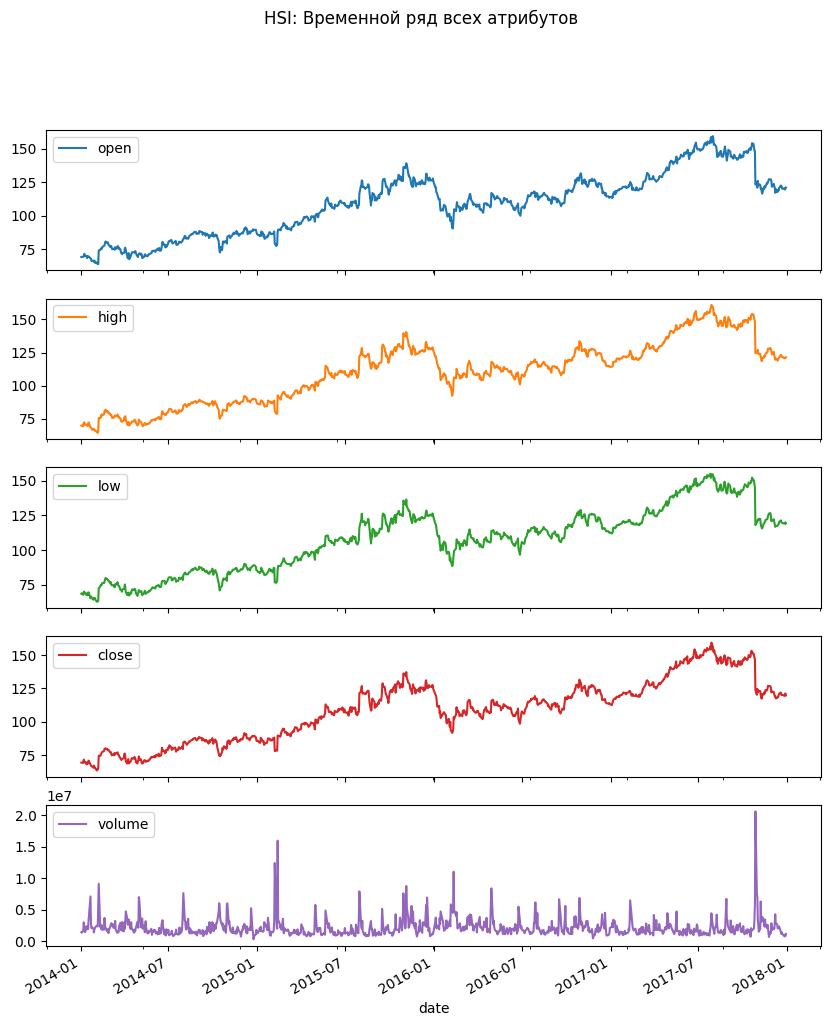

In [ ]:
expe_data.set_index('date', inplace=True)
expe_data.index = pd.to_datetime(expe_data.index)

expe_data.plot(subplots=True, figsize=(10, 12), title='HSI: Временной ряд всех атрибутов')

Далее будем рассматривать цену закрытия

Произведем декомпозицию временного ряда

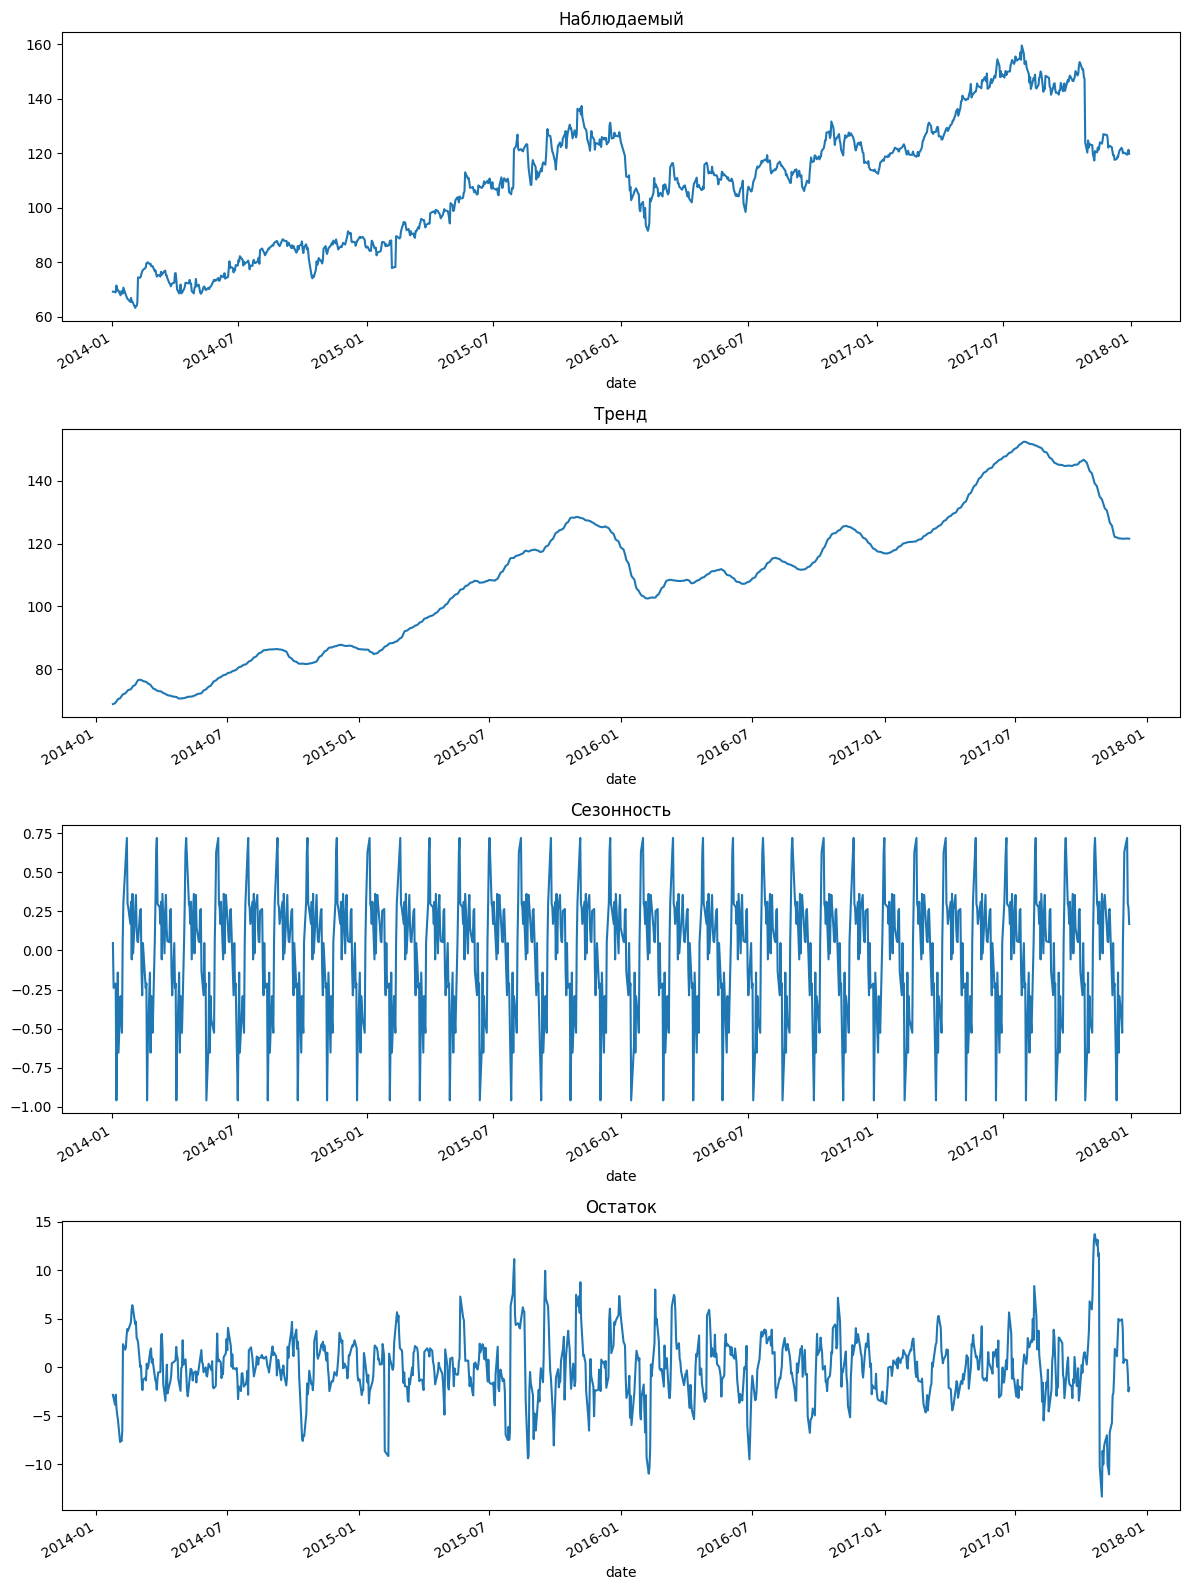

In [ ]:
decomposition = seasonal_decompose(expe_data['close'], model='additive', period=30)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Наблюдаемый')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Тренд')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Сезонность')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Остаток')
plt.tight_layout()
plt.show()

График сезонности демонстрирует высокую амплитуду колебаний, что свидетельствует о явной сезонности

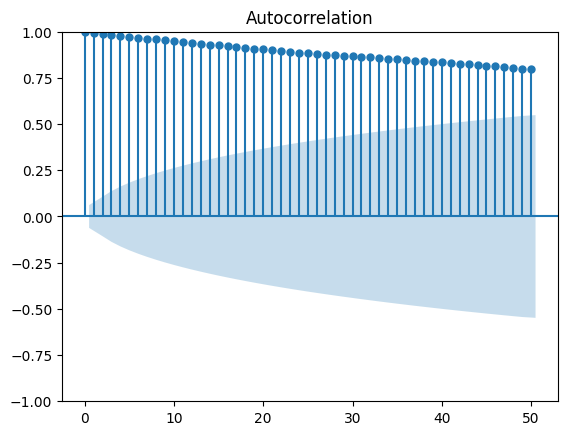

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(expe_data['close'], lags=50)
plt.show()

<ipython-input-11-36d3032038ce>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = expe_data['close'].resample('M').mean()


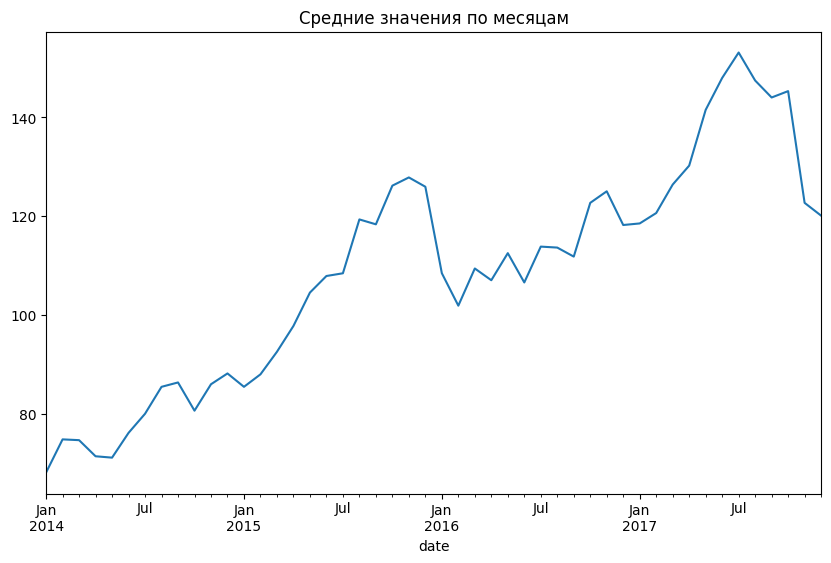

In [ ]:
monthly_data = expe_data['close'].resample('M').mean()

monthly_data.plot(title='Средние значения по месяцам', figsize=(10,6))
plt.show()

Удалим сезонность из ряда и сравним исходный ряд с десезонализированным

<ipython-input-12-cb86240b0df1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expe_data['deseasonalized'] = expe_data['close'] - decomposition.seasonal


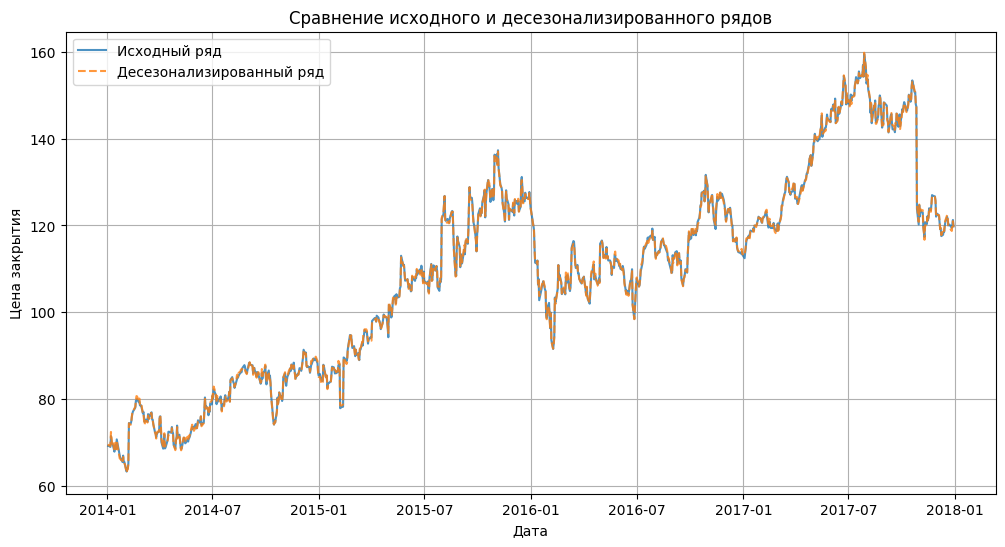

In [ ]:
# Декомпозиция временного ряда
decomposition = seasonal_decompose(expe_data['close'], model='additive', period=30)

# Создаем десезонализированный ряд
expe_data['deseasonalized'] = expe_data['close'] - decomposition.seasonal

# Сравнение рядов: исходного и десезонализированного
plt.figure(figsize=(12, 6))
plt.plot(expe_data['close'], label='Исходный ряд', alpha=0.8)
plt.plot(expe_data['deseasonalized'], label='Десезонализированный ряд', linestyle='--', alpha=0.8)
plt.legend()
plt.title('Сравнение исходного и десезонализированного рядов')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid()
plt.show()

In [ ]:
slise_data = expe_data['close'].iloc[-190:-50]

В общем, можно сделать вывод о  незначительном влиянии сезонности, т.к. графики практически сливаются, и различия заметны лишь в некоторых местах.


Построение прогноза на основе тренда и сезонности

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


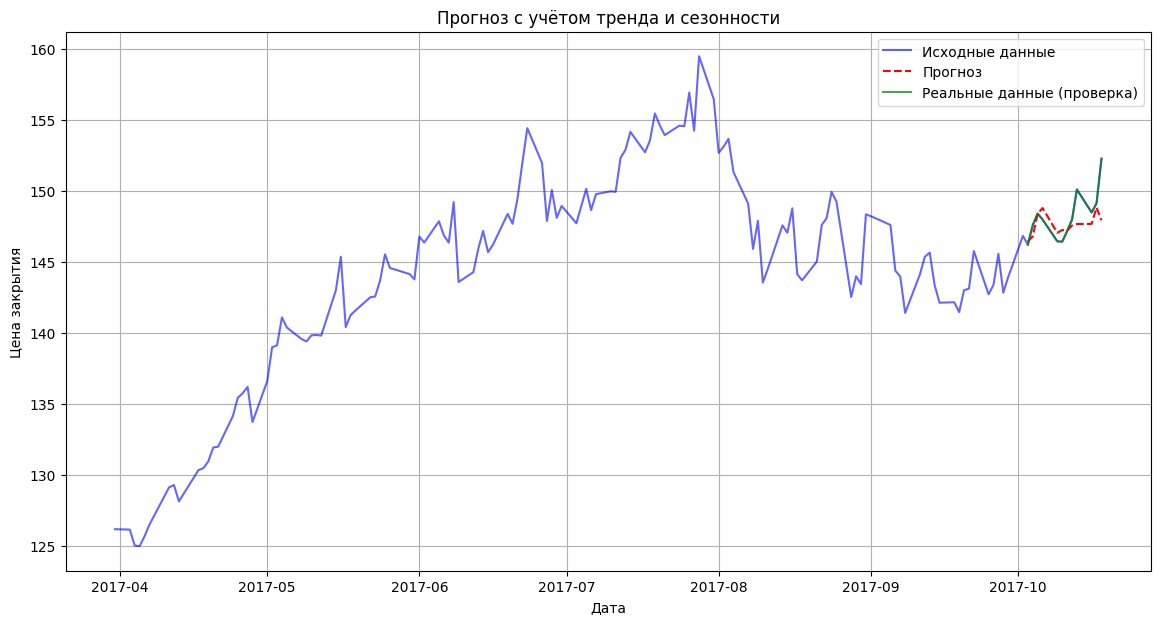

In [ ]:
target_column = 'close'

train_data = slise_data.iloc[-150:-12]
test_data = slise_data.iloc[-12:]

model = ExponentialSmoothing(
    train_data,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

forecast = model.forecast(12)

plt.figure(figsize=(14, 7))

plt.plot(slise_data.index[-150:], slise_data[-150:], label='Исходные данные', color='blue', alpha=0.6)

plt.plot(test_data.index, forecast, label='Прогноз', color='red', linestyle='--')

plt.plot(test_data.index, test_data, label='Реальные данные (проверка)', color='green', alpha=0.7)

plt.title('Прогноз с учётом тренда и сезонности')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid()
plt.show()

Рассчитаем MAE и RMSE для прогноза

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.97
RMSE: 1.53


В целом, значения относительно небольшие, что свидетельствует об относительно качественном прогнозе

## Проверка стационарности ряда

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

def adf_test(series, name='Ряд'):
    result = adfuller(series, autolag='AIC')
    print(f'Тест Дики-Фуллера для {name}:')
    print(f'ADF Статистика: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Критические значения:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    if result[1] > 0.05:
        print(f'Ряд {name} нестационарен.\n')
    else:
        print(f'Ряд {name} стационарен.\n')
    return result[1]

p_value = adf_test(slise_data, name='Исходные данные')

if p_value > 0.05:
    diff_data = slise_data.diff().dropna()
    print('Применены разности для приведения ряда к стационарному виду.\n')

    adf_test(diff_data, name='Ряд после взятия разностей')
else:
    print('Приведение ряда к стационарному виду не требуется.\n')

Тест Дики-Фуллера для Исходные данные:
ADF Статистика: -2.4472
p-value: 0.1289
Критические значения:
	1%: -3.4821
	5%: -2.8842
	10%: -2.5789
Ряд Исходные данные нестационарен.

Применены разности для приведения ряда к стационарному виду.

Тест Дики-Фуллера для Ряд после взятия разностей:
ADF Статистика: -3.3552
p-value: 0.0126
Критические значения:
	1%: -3.4821
	5%: -2.8842
	10%: -2.5789
Ряд Ряд после взятия разностей стационарен.



Временной ряд не влялся стационарны, произведено привеление ряда к стационарному виду.

## AR-модель

Лучшая модель AR: порядок p=29 по AIC=381.167327457915 и p=29 по BIC=455.0101531328053
MAE: 2.4063, RMSE: 2.9334


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


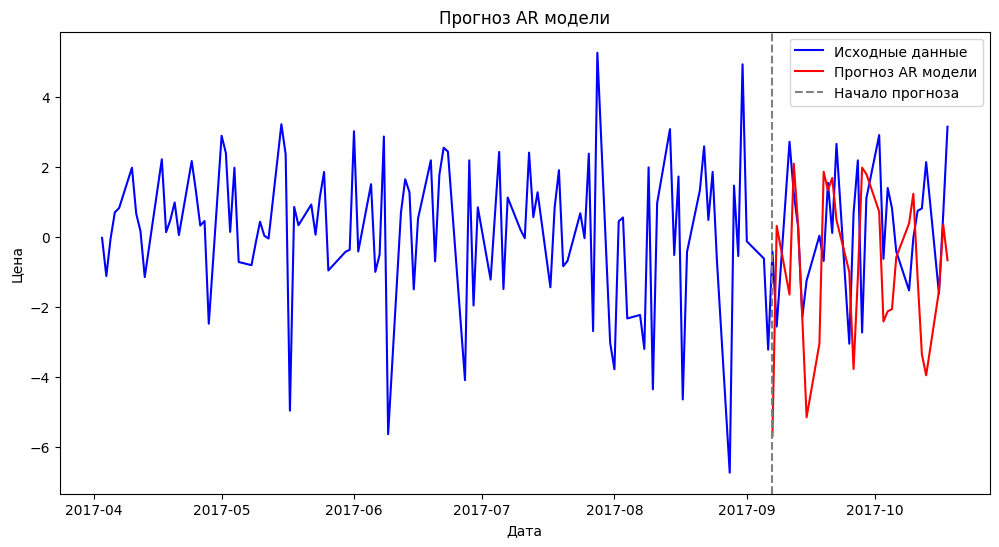

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

best_aic, best_bic, best_order_ar = float("inf"), float("inf"), None

train_data = diff_data.iloc[-300:-30]
test_data = diff_data.iloc[-30:]

for p in range(1, 30):
    try:
        model = AutoReg(train_data, lags=p).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order_ar = p
        if model.bic < best_bic:
            best_bic = model.bic
            best_order_ar_bic = p
    except Exception as e:
        print(f"Ошибка на шаге p={p}: {e}")
        continue

print(f"Лучшая модель AR: порядок p={best_order_ar} по AIC={best_aic} и p={best_order_ar_bic} по BIC={best_bic}")

ar_model = AutoReg(train_data, lags=best_order_ar).fit()

ar_forecast = ar_model.forecast(len(test_data))

mae = mean_absolute_error(test_data, ar_forecast)
rmse = np.sqrt(mean_squared_error(test_data, ar_forecast))

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(diff_data, label='Исходные данные', color='blue')
plt.plot(test_data.index, ar_forecast, label='Прогноз AR модели', color='red')
plt.axvline(test_data.index[0], color='gray', linestyle='--', label='Начало прогноза')
plt.title('Прогноз AR модели')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

##Модель MA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Лучшая модель MA: порядок q=10 по AIC=579.0909300332618 и q=1 по BIC=595.4941261890896


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

MAE: 1.3521, RMSE: 1.6862, MAPE: nan%


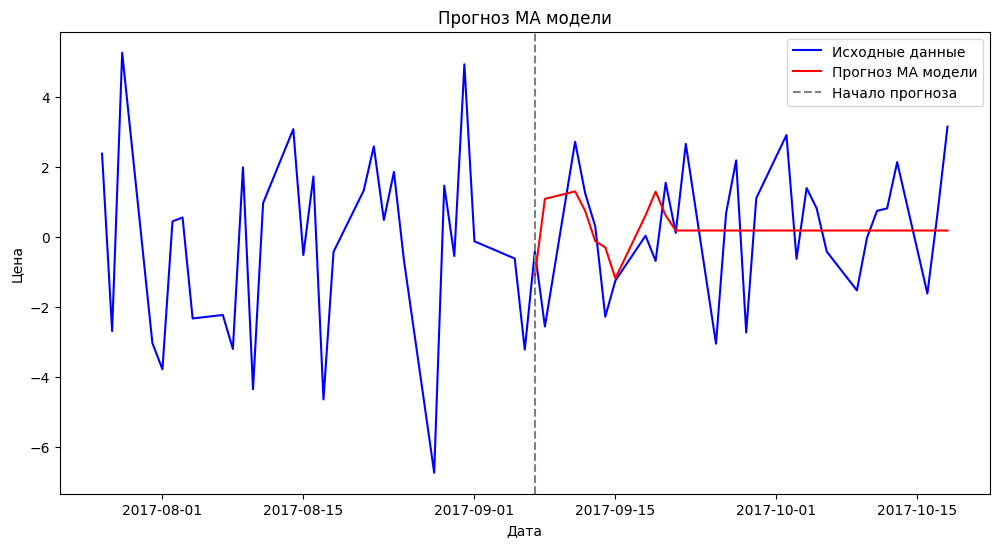

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Поиск оптимального порядка модели MA
best_aic, best_bic, best_order_MA = float("inf"), float("inf"), None
for q in range(1, 30):
    try:
        model = ARIMA(diff_data, order=(0, 0, q)).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order_MA = q
        if model.bic < best_bic:
            best_bic = model.bic
            best_order_bic = q
    except Exception as e:
        print(f"Ошибка на шаге q={q}: {e}")
        continue

print(f"Лучшая модель MA: порядок q={best_order_MA} по AIC={best_aic} и q={best_order_bic} по BIC={best_bic}")

ma_model = ARIMA(diff_data.iloc[:-30], order=(0, 0, best_order_MA)).fit()

ma_forecast = ma_model.forecast(30)

test_data = diff_data.iloc[-30:]

mae = mean_absolute_error(test_data, ma_forecast)
rmse = np.sqrt(mean_squared_error(test_data, ma_forecast))
mape = mean_absolute_percentage_error(test_data, ma_forecast)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(diff_data[-60:], label='Исходные данные', color='blue')
plt.plot(test_data.index, ma_forecast, label='Прогноз MA модели', color='red')
plt.axvline(test_data.index[0], color='gray', linestyle='--', label='Начало прогноза')
plt.title('Прогноз MA модели')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

## Модель ARMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

Лучшая модель ARMA по AIC: порядок (p, q)=(4, 6)
Лучшая модель ARMA по BIC: порядок (p, q)=(2, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARMA Модель (порядок (4, 6)): MAE=1.5034, RMSE=1.8932, MAPE=nan%


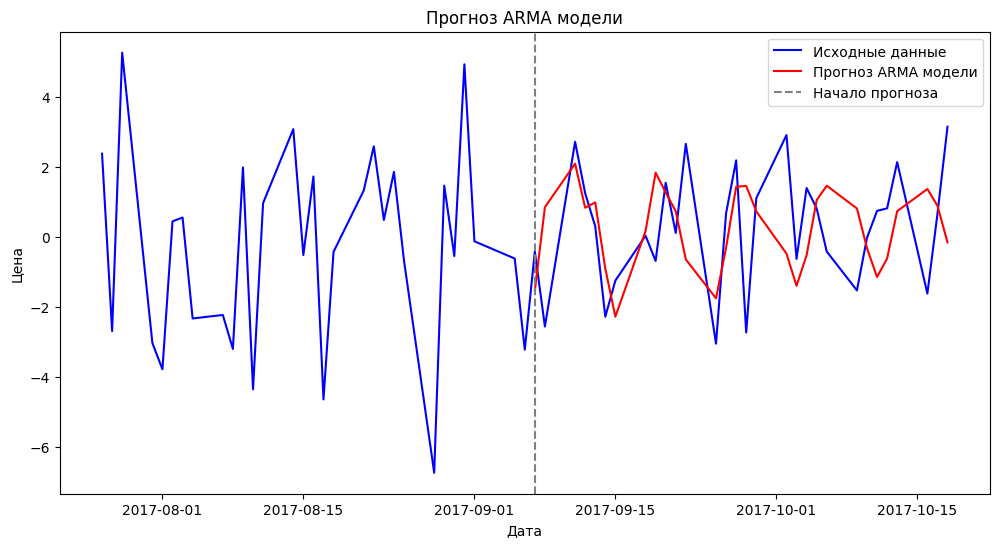

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA

arma_orders = arma_order_select_ic(diff_data, ic=['aic', 'bic'], max_ar=30, max_ma=30)
best_aic_order = arma_orders['aic_min_order']
best_bic_order = arma_orders['bic_min_order']

print(f"Лучшая модель ARMA по AIC: порядок (p, q)={best_aic_order}")
print(f"Лучшая модель ARMA по BIC: порядок (p, q)={best_bic_order}")

arma_model = ARIMA(diff_data.iloc[:-30], order=(best_aic_order[0], 0, best_aic_order[1])).fit()

arma_forecast = arma_model.forecast(30)

test_data = diff_data.iloc[-30:]

arma_mae = mean_absolute_error(test_data, arma_forecast)
arma_rmse = np.sqrt(mean_squared_error(test_data, arma_forecast))
arma_mape = mean_absolute_percentage_error(test_data, arma_forecast)

print(f"ARMA Модель (порядок {best_aic_order}): MAE={arma_mae:.4f}, RMSE={arma_rmse:.4f}, MAPE={arma_mape:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(diff_data[-60:], label='Исходные данные', color='blue')
plt.plot(test_data.index, arma_forecast, label='Прогноз ARMA модели', color='red')
plt.axvline(test_data.index[0], color='gray', linestyle='--', label='Начало прогноза')
plt.title('Прогноз ARMA модели')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

## Модель ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Лучшая модель ARIMA по AIC = 608.3756471559791; порядок (p, d, q)=(25, 1, 6)
Лучшая модель ARIMA по BIC = 702.0477650810096; порядок (p, d, q)=(25, 1, 6)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA Модель (порядок (25, 1, 6)): MAE=1.7118, RMSE=2.0300, MAPE=nan%


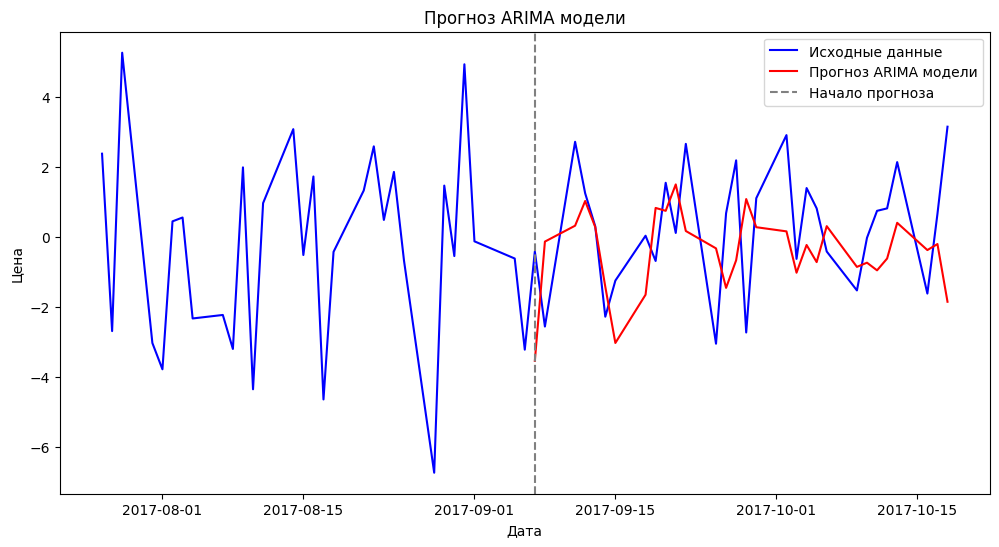

In [ ]:
best_aic, best_bic, best_order_arima = float("inf"), float("inf"), None
for p in range(max(0, best_order_ar_bic-4), best_order_ar_bic+4):
    for q in range(max(0, best_order_MA-4), best_order_MA+4):
        try:
            model = ARIMA(diff_data, order=(p, 1, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order_arima = (p, 1, q)
            if model.bic < best_bic:
                best_bic = model.bic
                best_order_bic = (p, 1, q)
        except Exception as e:
            continue

print(f"Лучшая модель ARIMA по AIC = {best_aic}; порядок (p, d, q)={best_order_arima}")
print(f"Лучшая модель ARIMA по BIC = {best_bic}; порядок (p, d, q)={best_order_bic}")

arima_model = ARIMA(diff_data.iloc[:-30], order=best_order_arima).fit()

#
arima_forecast = arima_model.forecast(30)

arima_mae = mean_absolute_error(test_data, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
arima_mape = mean_absolute_percentage_error(test_data, arima_forecast)

print(f"ARIMA Модель (порядок {best_order_arima}): MAE={arima_mae:.4f}, RMSE={arima_rmse:.4f}, MAPE={arima_mape:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(diff_data[-60:], label='Исходные данные', color='blue')
plt.plot(test_data.index, arima_forecast, label='Прогноз ARIMA модели', color='red')
plt.axvline(test_data.index[0], color='gray', linestyle='--', label='Начало прогноза')
plt.title('Прогноз ARIMA модели')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()